In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from seaborn import colors
import folium 

In [3]:
df = pd.read_csv(r"C:\Users\krupa\OneDrive\Desktop\practice\dataset\globalterroris.csv",encoding='ISO-8859-1')
df

C:\Users\krupa\AppData\Local\Temp\ipykernel_19488\334783365.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\krupa\OneDrive\Desktop\practice\dataset\globalterroris.csv",encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
df['related'] = df['related'].fillna(0)
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related            0
Length: 135, dtype: int64

In [7]:
df['approxdate'] = df['approxdate'].fillna(0)
df.isnull().sum()

eventid       0
iyear         0
imonth        0
iday          0
approxdate    0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 135, dtype: int64

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
181686    False
181687    False
181688    False
181689    False
181690    False
Length: 181691, dtype: bool

In [9]:
df.isnull().sum()

eventid       0
iyear         0
imonth        0
iday          0
approxdate    0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 135, dtype: int64

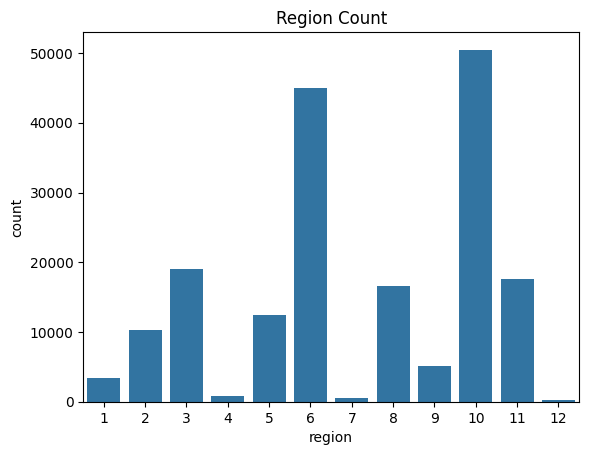

In [10]:
sns.countplot(data=df, x="region")
plt.title("Region Count")
plt.show()

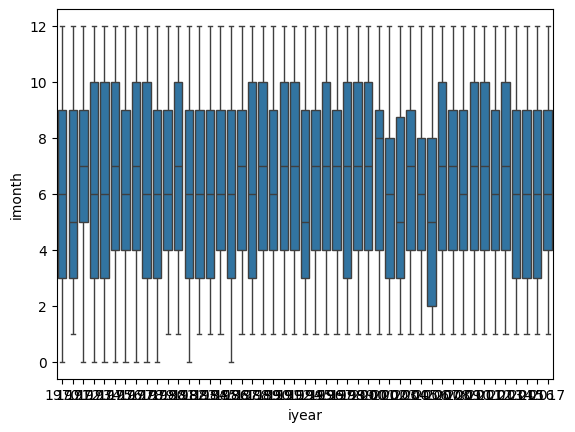

In [11]:
sns.boxplot(data=df, x="iyear", y="imonth")
plt.show()

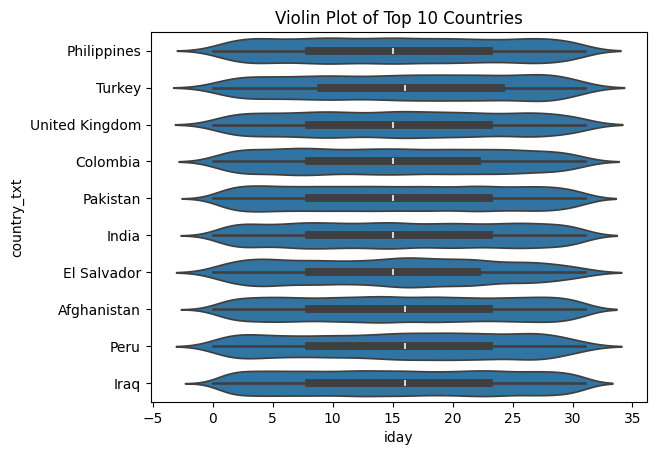

In [12]:
# Count occurrences for each category in 'country_txt'
top_10_countries = df['country_txt'].value_counts().head(10).index

# Filter the DataFrame to include only rows where 'country_txt' is in the top 10
filtered_df = df[df['country_txt'].isin(top_10_countries)]

# Plot the violin plot with the filtered data
sns.violinplot(data=filtered_df, x="iday", y="country_txt")
plt.title("Violin Plot of Top 10 Countries")
plt.show()

In [13]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,0
1,197000000002,1970,0,0,0,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,0
2,197001000001,1970,1,0,0,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0
3,197001000002,1970,1,0,0,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0
4,197001000003,1970,1,0,0,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0


drop columns 

In [14]:
df = df.drop(['ransomnote'],axis=1) 

In [15]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=134)

In [16]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,0
1,197000000002,1970,0,0,0,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,0
2,197001000001,1970,1,0,0,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0
3,197001000002,1970,1,0,0,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0
4,197001000003,1970,1,0,0,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0


Rename the columns : 

In [17]:
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country_name'})

,eventid,year,month,day,approxdate,extended,resolution,country,country_name,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,0
1,197000000002,1970,0,0,0,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,0
2,197001000001,1970,1,0,0,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0
3,197001000002,1970,1,0,0,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0
4,197001000003,1970,1,0,0,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,0
181687,201712310029,2017,12,31,0,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,0
181688,201712310030,2017,12,31,0,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,0
181689,201712310031,2017,12,31,0,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,0


In [18]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,0
1,197000000002,1970,0,0,0,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,0
2,197001000001,1970,1,0,0,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0
3,197001000002,1970,1,0,0,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0
4,197001000003,1970,1,0,0,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,0


Region Count

In [ ]:
new =df['region_txt'].value_counts()
new

region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64

C:\Users\krupa\AppData\Local\Temp\ipykernel_19488\596073414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="region_txt",data=df, palette="viridis")


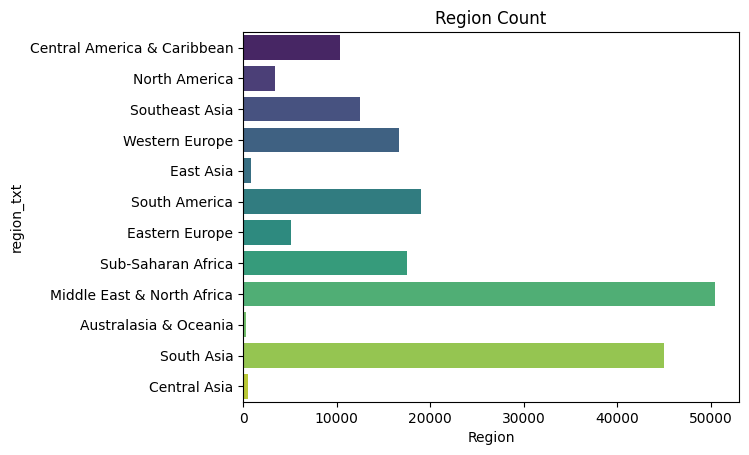

In [20]:
sns.countplot(y="region_txt",data=df, palette="viridis")
plt.title("Region Count")
plt.xlabel("Region")
plt.show()

Country Count 

In [21]:
new =df['country_txt'].value_counts().head(10)
new

country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

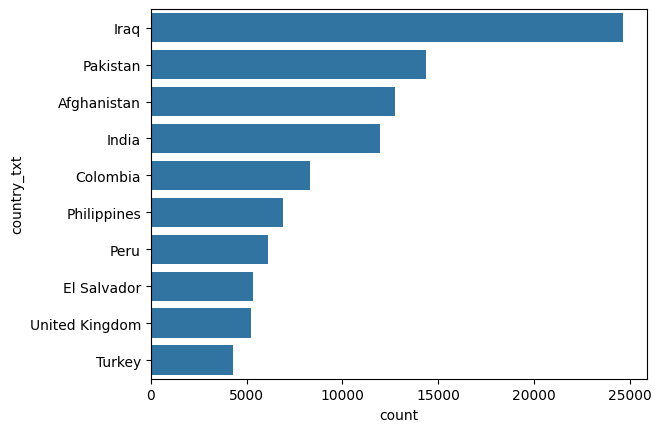

In [22]:
# country wise
countries = df['country_txt'].value_counts().head(10).index
filtered_df = df[df['country_txt'].isin(countries)]
sns.countplot(y="country_txt", data=filtered_df, order=countries)
plt.show()

City Count

In [23]:
new =df['city'].value_counts().head(10)
new

city
Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: count, dtype: int64

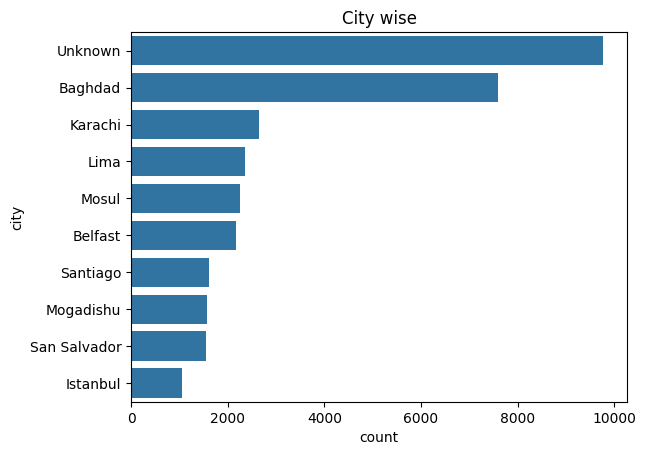

In [24]:
# city wise

City = df['city'].value_counts().head(10).index
filtered_df = df[df['city'].isin(City)]
sns.countplot(y="city", data=filtered_df, order=City)
plt.title("City wise")
plt.show() 

Map 

In [25]:
data = {
    "Place": ["Santo Domingo", "Mexico city", "Chicago", "Athens", "Phoenix"],
    "Latitude": [18.4861, 19.4326, 41.8781, 37.9838, 33.4484],
    "Longitude": [-69.9312, -99.1332, -87.6298, 23.7275, -112.0740],
}

df = pd.DataFrame(data)

# Create a map centered on the average latitude and longitude
map_center = [df["Latitude"].mean(), df["Longitude"].mean()]
map = folium.Map(location=map_center, zoom_start=5)

# Add markers for each location
for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=row["Place"]
    ).add_to(map)

# Display the map in Jupyter Notebook
map

In [26]:
df

,Place,Latitude,Longitude
0,Santo Domingo,18.4861,-69.9312
1,Mexico city,19.4326,-99.1332
2,Chicago,41.8781,-87.6298
3,Athens,37.9838,23.7275
4,Phoenix,33.4484,-112.0740
